In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#2. 打开csv数据
with open('Data_O2_Oxidation_3.csv', encoding = 'UTF-8') as f:
    df = pd.read_csv(f)  #index_col=0 告诉第一列是索引
df
#first_column_header = df.columns[0]
#print(first_column_header)

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,AcCom,OxiStat,rpm,NaOH_c,Yld
0,3.0,97.0,0.0,46.50,20.0,10.0,120,60,0.0,Missing,Missing,Missing,400,2.0,0.019780
1,3.0,97.0,0.0,46.50,20.0,10.0,150,60,0.0,Missing,Missing,Missing,400,2.0,0.034730
2,3.0,97.0,0.0,46.50,20.0,10.0,160,60,0.0,Missing,Missing,Missing,400,2.0,0.048530
3,3.0,97.0,0.0,46.50,20.0,10.0,170,60,0.0,Missing,Missing,Missing,400,2.0,0.036800
4,3.0,97.0,0.0,46.50,20.0,10.0,200,60,0.0,Missing,Missing,Missing,400,2.0,0.034730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.2,30.4,68.4,38.48,50.0,4.0,150,30,0.0,Missing,Missing,Missing,800,2.0,0.011905
235,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.0,21.988,CuO,2,800,2.0,0.015186
236,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.5,21.988,CuO,2,800,2.0,0.015605
237,1.2,30.4,68.4,38.48,50.0,4.0,150,30,2.0,21.988,CuO,2,800,2.0,0.015954


In [9]:
#这行代码在后面会用到
y = df.iloc[:, -1]
X = df.drop('Yld', axis = 1)
X
#y

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,AcCom,OxiStat,rpm,NaOH_c
0,3.0,97.0,0.0,46.50,20.0,10.0,120,60,0.0,Missing,Missing,Missing,400,2.0
1,3.0,97.0,0.0,46.50,20.0,10.0,150,60,0.0,Missing,Missing,Missing,400,2.0
2,3.0,97.0,0.0,46.50,20.0,10.0,160,60,0.0,Missing,Missing,Missing,400,2.0
3,3.0,97.0,0.0,46.50,20.0,10.0,170,60,0.0,Missing,Missing,Missing,400,2.0
4,3.0,97.0,0.0,46.50,20.0,10.0,200,60,0.0,Missing,Missing,Missing,400,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.2,30.4,68.4,38.48,50.0,4.0,150,30,0.0,Missing,Missing,Missing,800,2.0
235,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.0,21.988,CuO,2,800,2.0
236,1.2,30.4,68.4,38.48,50.0,4.0,150,30,1.5,21.988,CuO,2,800,2.0
237,1.2,30.4,68.4,38.48,50.0,4.0,150,30,2.0,21.988,CuO,2,800,2.0


In [10]:
unique_elements = df['AcCom'].unique()
unique_elements

array(['Missing', 'CuO', 'MoPO', 'ZrO', 'V2O5', 'Pd'], dtype=object)

将非催化的和催化的数据分开来

In [16]:
import pandas as pd

# 分割数据：获取AcCom为'Missing'的数据
df_NonC = df[X['AcCom'] == 'Missing']

# 获取AcCom不是'Missing'的数据
df_C = df[df['AcCom'] != 'Missing']

# 查看结果
#print("包含'Missing'的数据：")
#print(df_NonC.head())

#print("不包含'Missing'的数据：")
#print(df_C.head())
df_C.shape

(55, 15)

下面导入不同催化剂的特性

In [17]:
from matminer.featurizers.conversions import StrToComposition

# 使用featurize_dataframe方法，并设置ignore_errors=True
df_C = StrToComposition().featurize_dataframe(df_C, 'AcCom', ignore_errors=True)

# 查看前几行数据
df_C

StrToComposition:   0%|          | 0/55 [00:00<?, ?it/s]

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,AcCom,OxiStat,rpm,NaOH_c,Yld,composition
172,5.0,13.0,82.0,2.10,5.00,0.0,150,60,0.250,32,CuO,2,1800,0.25,0.005000,"(Cu, O)"
173,5.0,13.0,82.0,2.10,5.00,4.2,150,60,0.100,32,CuO,2,1800,0.25,0.044000,"(Cu, O)"
174,5.0,13.0,82.0,2.10,5.00,4.2,150,60,0.350,32,CuO,2,1800,0.25,0.039000,"(Cu, O)"
175,5.0,13.0,82.0,2.10,5.00,4.2,150,15,0.250,32,CuO,2,1800,0.25,0.032000,"(Cu, O)"
176,5.0,13.0,82.0,2.10,5.00,4.2,150,30,0.250,32,CuO,2,1800,0.25,0.039000,"(Cu, O)"
177,5.0,13.0,82.0,2.10,5.00,4.2,150,60,0.250,32,CuO,2,1800,0.25,0.051000,"(Cu, O)"
178,5.0,13.0,82.0,2.10,5.00,4.2,150,120,0.250,32,CuO,2,1800,0.25,0.043000,"(Cu, O)"
179,5.0,13.0,82.0,2.10,5.00,4.2,150,60,0.250,32,CuO,2,1800,0.25,0.051000,"(Cu, O)"
181,19.0,37.0,44.0,8.40,33.33,5.0,150,180,6.667,150.85,MoPO,5.5,800,2.00,0.090000,"(Mo, P, O)"
182,19.0,37.0,44.0,8.40,33.33,5.0,150,180,6.667,106.63,MoPO,5.5,800,2.00,0.058000,"(Mo, P, O)"


In [18]:
#添加描述符
from matminer.featurizers.composition import ElementProperty  
ep_feat = ElementProperty.from_preset(preset_name = 'magpie')   #添加一个名字叫‘magpie'的描述符集合
df_C = ep_feat.featurize_dataframe(df_C, col_id = 'composition')
df_C.head()

ElementProperty:   0%|          | 0/55 [00:00<?, ?it/s]

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
172,5.0,13.0,82.0,2.1,5.0,0.0,150,60,0.25,32,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0
173,5.0,13.0,82.0,2.1,5.0,4.2,150,60,0.10,32,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0
174,5.0,13.0,82.0,2.1,5.0,4.2,150,60,0.35,32,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0
175,5.0,13.0,82.0,2.1,5.0,4.2,150,15,0.25,32,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0
176,5.0,13.0,82.0,2.1,5.0,4.2,150,30,0.25,32,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0


In [19]:
#添加组分特征

from matminer.featurizers.conversions import CompositionToOxidComposition
from matminer.featurizers.composition import OxidationStates

df_C = CompositionToOxidComposition().featurize_dataframe(df_C, 'composition')
df_C.head()

CompositionToOxidComposition:   0%|          | 0/55 [00:00<?, ?it/s]

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid
172,5.0,13.0,82.0,2.1,5.0,0.0,150,60,0.25,32,...,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)"
173,5.0,13.0,82.0,2.1,5.0,4.2,150,60,0.10,32,...,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)"
174,5.0,13.0,82.0,2.1,5.0,4.2,150,60,0.35,32,...,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)"
175,5.0,13.0,82.0,2.1,5.0,4.2,150,15,0.25,32,...,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)"
176,5.0,13.0,82.0,2.1,5.0,4.2,150,30,0.25,32,...,0.0,0.0,0.0,12.0,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)"


In [20]:
os_feat = OxidationStates()
df_C = os_feat.featurize_dataframe(df_C, 'composition_oxid')

df_C.head()

OxidationStates:   0%|          | 0/55 [00:00<?, ?it/s]

,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
172,5.0,13.0,82.0,2.1,5.0,0.0,150,60,0.25,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2,2,4,2.828427
173,5.0,13.0,82.0,2.1,5.0,4.2,150,60,0.10,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2,2,4,2.828427
174,5.0,13.0,82.0,2.1,5.0,4.2,150,60,0.35,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2,2,4,2.828427
175,5.0,13.0,82.0,2.1,5.0,4.2,150,15,0.25,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2,2,4,2.828427
176,5.0,13.0,82.0,2.1,5.0,4.2,150,30,0.25,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2,2,4,2.828427


In [21]:
import pandas as pd
import numpy as np

# 假设df_C和df_NonC已经定义

# 获取df_C中所有的列
columns_df_C = df_C.columns

# 找出df_NonC中缺失的列
missing_columns = set(columns_df_C) - set(df_NonC.columns)

# 为df_NonC添加缺失的列，并初始化为NaN或其他适当的值
for column in missing_columns:
    df_NonC[column] = np.nan

# 确保列的顺序一致
df_NonC = df_NonC[columns_df_C]

# 合并数据
df = pd.concat([df_C, df_NonC], ignore_index=True)

# 查看合并后的数据
df

<ipython-input-21-7861f2ae53fd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NonC[column] = np.nan
<ipython-input-21-7861f2ae53fd>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_NonC[column] = np.nan


,H_c,G_c,S_c,β-O-4_c,Rf,P_O,Tem,Rt,C_c,BETs,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,5.0,13.0,82.0,2.10,5.0,0.0,150,60,0.25,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2.0,2.0,4.0,2.828427
1,5.0,13.0,82.0,2.10,5.0,4.2,150,60,0.10,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2.0,2.0,4.0,2.828427
2,5.0,13.0,82.0,2.10,5.0,4.2,150,60,0.35,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2.0,2.0,4.0,2.828427
3,5.0,13.0,82.0,2.10,5.0,4.2,150,15,0.25,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2.0,2.0,4.0,2.828427
4,5.0,13.0,82.0,2.10,5.0,4.2,150,30,0.25,32,...,225.0,213.0,118.5,106.5,12.0,"(Cu2+, O2-)",-2.0,2.0,4.0,2.828427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,33.0,30.0,37.0,1.30,60.0,5.0,120,60,0.00,Missing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,33.0,30.0,37.0,1.30,60.0,5.0,120,90,0.00,Missing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,33.0,30.0,37.0,1.30,60.0,5.0,120,120,0.00,Missing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,33.0,30.0,37.0,1.30,60.0,5.0,120,150,0.00,Missing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# 选择非数值列
non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns

# 输出非数值列的名称
print("非数值类目名字：")
print(non_numeric_columns)

非数值类目名字：
Index(['BETs', 'AcCom', 'OxiStat', 'composition', 'composition_oxid'], dtype='object')


In [23]:
df.drop(['AcCom', 'composition', 'composition_oxid', 'OxiStat'], axis=1, inplace=True)


In [24]:
# 选择非数值列
non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns

# 输出非数值列的名称
print("非数值类目名字：")
print(non_numeric_columns)

非数值类目名字：
Index(['BETs'], dtype='object')


In [25]:
unique_elements = df['BETs'].unique()
unique_elements

array(['32', '150.85', '106.63', '209.07', '651.55', '150', '85.8',
       '90.8', '102.4', '365', '21.988', 'Missing'], dtype=object)

In [26]:
import pandas as pd

# 假设df是你的DataFrame

# 转换OxiStat列中的数值为float，忽略无法转换的错误
df['BETs'] = pd.to_numeric(df['BETs'], errors='coerce')

# 计算除了NaN之外的均值
mean_value = df['BETs'].mean()

# 替换NaN为均值
df['BETs'].fillna(mean_value, inplace=True)

# 检查结果
print(df['BETs'])

0       32.000000
1       32.000000
2       32.000000
3       32.000000
4       32.000000
          ...    
234    116.141818
235    116.141818
236    116.141818
237    116.141818
238    116.141818
Name: BETs, Length: 239, dtype: float64


In [27]:
# 对所有列执行转换：将非数值的内容转为NaN，以便统一处理
df = df.apply(pd.to_numeric, errors='coerce')

# 计算所有列的均值
column_means = df.mean()

# 替换所有NaN值为所在列的均值
df.fillna(column_means, inplace=True)

# 查看处理后的结果
df.shape

(239, 149)

In [28]:
#剔除相关性差的描述符

import pandas as pd
from scipy.stats import pearsonr

# 假设df是你的DataFrame，'Target'是你的目标变量
features = df.drop('Yld', axis=1)  # 去除目标变量列
target = df['Yld']

# 计算每个特征与目标变量之间的Pearson相关系数
correlations = {}
for column in features.columns:
    correlation, _ = pearsonr(features[column], target)
    correlations[column] = correlation

# 将相关系数转换为DataFrame
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# 设定阈值，这里以0.2为例，保留绝对值大于0.2的特征
selected_features = corr_df[corr_df['Correlation'].abs() > 0.2]

# 输出选定的特征
print(selected_features)


                                    Correlation
G_c                                    0.382737
S_c                                   -0.393334
Tem                                    0.240941
Rt                                     0.294881
MagpieData maximum Number              0.211804
MagpieData minimum MendeleevNumber    -0.206699
MagpieData maximum AtomicWeight        0.212335
MagpieData maximum MeltingT            0.237694
MagpieData minimum Column             -0.213434
MagpieData maximum Row                 0.231364
MagpieData maximum CovalentRadius      0.211064
MagpieData avg_dev NdValence          -0.200342
MagpieData maximum NValence           -0.222464
MagpieData range NValence             -0.226767
MagpieData avg_dev NValence           -0.228342
MagpieData maximum GSvolume_pa         0.228707
MagpieData mean GSvolume_pa            0.237932
MagpieData maximum GSbandgap           0.201258
MagpieData range GSbandgap             0.201258
MagpieData mean GSbandgap              0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [29]:
import pandas as pd

# 假设df是你的DataFrame，selected_features是包含选定特征名称的列表
selected_df = df[selected_features.index]  # 创建一个只包含选定特征的DataFrame

# 计算相关性矩阵
correlation_matrix = selected_df.corr()

# 寻找相关性大于0.9的特征对
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# 输出相关性大于0.9的特征对
print("高相关性特征对:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} 和 {pair[1]} 的相关性为 {pair[2]:.2f}")


高相关性特征对:
G_c 和 S_c 的相关性为 -0.97
MagpieData maximum Number 和 MagpieData maximum AtomicWeight 的相关性为 1.00
MagpieData maximum Number 和 MagpieData maximum Row 的相关性为 0.98
MagpieData maximum Number 和 MagpieData avg_dev NdValence 的相关性为 -0.91
MagpieData maximum Number 和 MagpieData range NValence 的相关性为 -0.94
MagpieData maximum Number 和 MagpieData avg_dev NValence 的相关性为 -0.93
MagpieData maximum Number 和 MagpieData mean GSvolume_pa 的相关性为 0.93
MagpieData minimum MendeleevNumber 和 MagpieData maximum MeltingT 的相关性为 -0.92
MagpieData minimum MendeleevNumber 和 MagpieData minimum Column 的相关性为 1.00
MagpieData minimum MendeleevNumber 和 MagpieData maximum CovalentRadius 的相关性为 -0.97
MagpieData minimum MendeleevNumber 和 MagpieData maximum NValence 的相关性为 0.99
MagpieData minimum MendeleevNumber 和 MagpieData maximum GSvolume_pa 的相关性为 -0.92
MagpieData maximum AtomicWeight 和 MagpieData maximum Row 的相关性为 0.98
MagpieData maximum AtomicWeight 和 MagpieData avg_dev NdValence 的相关性为 -0.92
MagpieData maximum AtomicWeight 和

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 从先前的步骤获取selected_features
selected_columns = selected_features.index.tolist()
selected_columns.append('Yld')  # 添加目标变量

# 创建新的DataFrame
new_df = df[selected_columns]

# 查看新的DataFrame
new_df

,G_c,S_c,Tem,Rt,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum AtomicWeight,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Row,...,MagpieData maximum NValence,MagpieData range NValence,MagpieData avg_dev NValence,MagpieData maximum GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,Yld
0,13.0,82.0,150,60,29.000000,64.000000,63.546000,1357.770000,11.000000,4.000000,...,11.000000,5.000000,2.500000,11.070000,10.087500,0.000000,0.000000,0.000000,0.000000,0.005000
1,13.0,82.0,150,60,29.000000,64.000000,63.546000,1357.770000,11.000000,4.000000,...,11.000000,5.000000,2.500000,11.070000,10.087500,0.000000,0.000000,0.000000,0.000000,0.044000
2,13.0,82.0,150,60,29.000000,64.000000,63.546000,1357.770000,11.000000,4.000000,...,11.000000,5.000000,2.500000,11.070000,10.087500,0.000000,0.000000,0.000000,0.000000,0.039000
3,13.0,82.0,150,15,29.000000,64.000000,63.546000,1357.770000,11.000000,4.000000,...,11.000000,5.000000,2.500000,11.070000,10.087500,0.000000,0.000000,0.000000,0.000000,0.032000
4,13.0,82.0,150,30,29.000000,64.000000,63.546000,1357.770000,11.000000,4.000000,...,11.000000,5.000000,2.500000,11.070000,10.087500,0.000000,0.000000,0.000000,0.000000,0.039000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,30.0,37.0,120,60,34.236364,60.436364,76.729264,1743.411455,9.690909,4.363636,...,9.745455,3.327273,1.651866,13.963225,11.943997,0.295455,0.295455,0.098485,0.131313,0.001613
235,30.0,37.0,120,90,34.236364,60.436364,76.729264,1743.411455,9.690909,4.363636,...,9.745455,3.327273,1.651866,13.963225,11.943997,0.295455,0.295455,0.098485,0.131313,0.001290
236,30.0,37.0,120,120,34.236364,60.436364,76.729264,1743.411455,9.690909,4.363636,...,9.745455,3.327273,1.651866,13.963225,11.943997,0.295455,0.295455,0.098485,0.131313,0.001183
237,30.0,37.0,120,150,34.236364,60.436364,76.729264,1743.411455,9.690909,4.363636,...,9.745455,3.327273,1.651866,13.963225,11.943997,0.295455,0.295455,0.098485,0.131313,0.001075


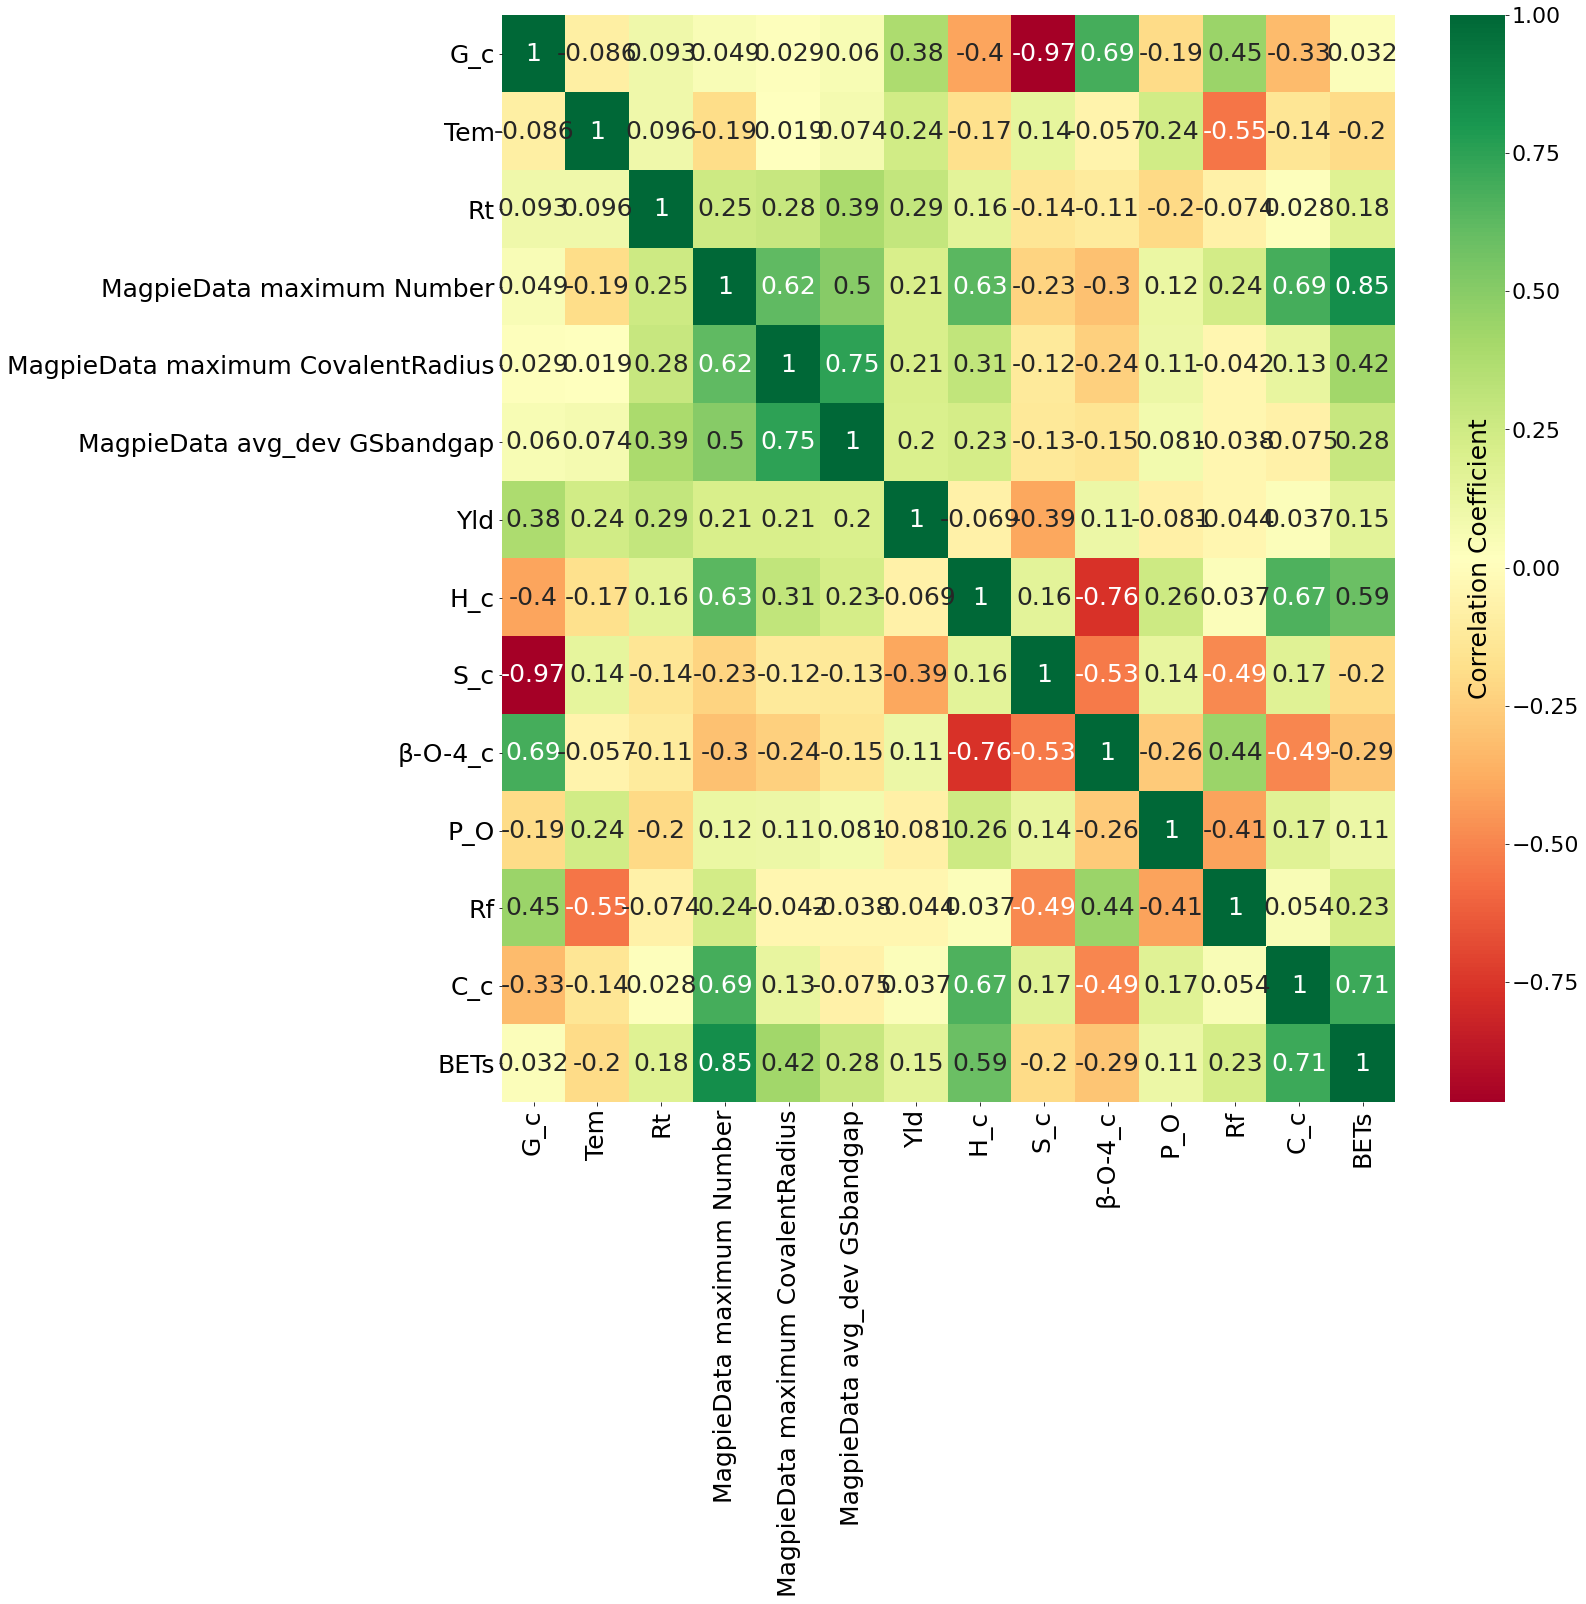

In [31]:
#2. 画热力图(未筛选描述符)
import matplotlib.pyplot as plt
import seaborn as sns

#手动删除描述符

excluded = ['S_c','MagpieData maximum Row','MagpieData maximum GSvolume_pa','MagpieData maximum GSbandgap', 'MagpieData range GSbandgap', 'MagpieData mean GSbandgap', 'MagpieData maximum NValence', 'MagpieData maximum MeltingT', 'MagpieData minimum Column', 'MagpieData minimum MendeleevNumber', 'MagpieData avg_dev NdValence','MagpieData maximum AtomicWeight', 'MagpieData range NValence','MagpieData avg_dev NValence','MagpieData mean GSvolume_pa']
df_new = new_df.drop(excluded, axis = 1)

#手动加入描述符
df_new['H_c'] = df['H_c']
df_new['S_c'] = df['S_c']
df_new['β-O-4_c'] = df['β-O-4_c']
df_new['P_O'] = df['P_O']
df_new['Rf'] = df['Rf']
df_new['C_c'] = df['C_c']
df_new['BETs'] = df['BETs']

#修改列名

# 计算新DataFrame的相关矩阵
corr_matrix = df_new.corr()

plt.figure(figsize = (20,20))

heatmap = sns.heatmap(df_new.corr(), 
            cmap='RdYlGn', 
            annot=True, 
            annot_kws={"size": 25},  # 调整热力图中数字字体大小
            cbar_kws={'label': 'Correlation Coefficient'})  # 可选: 增加颜色条的标签

# 调整颜色条数字字体大小
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)  # 设置颜色条刻度字体大小

# 设置颜色条标签字体居中并设置字体颜色为白色
cbar.ax.set_ylabel('Correlation Coefficient', fontsize=25, color='black', labelpad=-30)  # 字体大小，颜色，间距
cbar.ax.yaxis.set_label_position('left')  # 确保标签在颜色条的右侧
cbar.ax.yaxis.label.set_verticalalignment('center')  # 标签垂直居中

# 调整坐标轴刻度的字体大小
plt.xticks(fontsize=25, rotation=90)  # x轴字体大小和旋转角度
plt.yticks(fontsize=25, rotation=0)   # y轴字体大小


plt.savefig('O2_催化_热力图.tiff', dpi = 770)

In [33]:

# 保存DataFrame到CSV文件
df_new.to_csv('data_for_check.csv', index=False)

In [34]:
#设置自变量和因变量
y = df_new['Yld'].values
X = df_new.drop('Yld', axis = 1)

X

,G_c,Tem,Rt,MagpieData maximum Number,MagpieData maximum CovalentRadius,MagpieData avg_dev GSbandgap,H_c,S_c,β-O-4_c,P_O,Rf,C_c,BETs
0,13.0,150,60,29.000000,132.000000,0.000000,5.0,82.0,2.10,0.0,5.0,0.25,32.000000
1,13.0,150,60,29.000000,132.000000,0.000000,5.0,82.0,2.10,4.2,5.0,0.10,32.000000
2,13.0,150,60,29.000000,132.000000,0.000000,5.0,82.0,2.10,4.2,5.0,0.35,32.000000
3,13.0,150,15,29.000000,132.000000,0.000000,5.0,82.0,2.10,4.2,5.0,0.25,32.000000
4,13.0,150,30,29.000000,132.000000,0.000000,5.0,82.0,2.10,4.2,5.0,0.25,32.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,30.0,120,60,34.236364,138.309091,0.131313,33.0,37.0,1.30,5.0,60.0,0.00,116.141818
235,30.0,120,90,34.236364,138.309091,0.131313,33.0,37.0,1.30,5.0,60.0,0.00,116.141818
236,30.0,120,120,34.236364,138.309091,0.131313,33.0,37.0,1.30,5.0,60.0,0.00,116.141818
237,30.0,120,150,34.236364,138.309091,0.131313,33.0,37.0,1.30,5.0,60.0,0.00,116.141818


In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


# 设置显示最大行数，None表示不限制显示的行数
pd.set_option('display.max_rows', None)

# 使用 MinMaxScaler 进行归一化
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled

,G_c,Tem,Rt,MagpieData maximum Number,MagpieData maximum CovalentRadius,MagpieData avg_dev GSbandgap,H_c,S_c,β-O-4_c,P_O,Rf,C_c,BETs
0,0.000000,0.545455,0.186441,0.260870,0.000000,0.000000,0.151515,1.000000,0.014235,0.00,0.000000,0.005896,0.015903
1,0.000000,0.545455,0.186441,0.260870,0.000000,0.000000,0.151515,1.000000,0.014235,0.42,0.000000,0.002358,0.015903
2,0.000000,0.545455,0.186441,0.260870,0.000000,0.000000,0.151515,1.000000,0.014235,0.42,0.000000,0.008255,0.015903
3,0.000000,0.545455,0.033898,0.260870,0.000000,0.000000,0.151515,1.000000,0.014235,0.42,0.000000,0.005896,0.015903
4,0.000000,0.545455,0.084746,0.260870,0.000000,0.000000,0.151515,1.000000,0.014235,0.42,0.000000,0.005896,0.015903
5,0.000000,0.545455,0.186441,0.260870,0.000000,0.000000,0.151515,1.000000,0.014235,0.42,0.000000,0.005896,0.015903
6,0.000000,0.545455,0.389831,0.260870,0.000000,0.000000,0.151515,1.000000,0.014235,0.42,0.000000,0.005896,0.015903
7,0.000000,0.545455,0.186441,0.260870,0.000000,0.000000,0.151515,1.000000,0.014235,0.42,0.000000,0.005896,0.015903
8,0.282353,0.545455,0.593220,0.826087,0.511628,1.000000,0.575758,0.536585,0.126335,0.50,0.246348,0.157241,0.204685
9,0.282353,0.545455,0.593220,0.826087,0.511628,1.000000,0.575758,0.536585,0.126335,0.50,0.246348,0.157241,0.134446


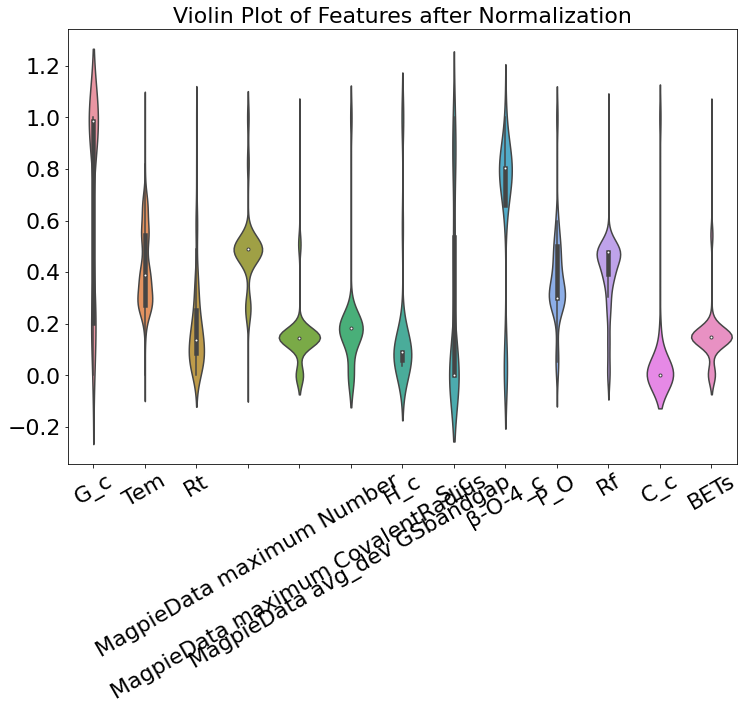

In [36]:
# 绘制小提琴图
plt.figure(figsize=(12, 8))
sns.violinplot(data=X_scaled)

# 调整刻度字体大小
plt.xticks(rotation=30, fontsize=22)  # x轴刻度字体大小为12
plt.yticks(fontsize=22)  # y轴刻度字体大小为12

plt.title('Violin Plot of Features after Normalization', fontsize=22)  # 调整标题字体大小

# 保存图片
plt.savefig('O2_C_violin_plot.png')  # 保存为 PNG 文件

plt.show()

In [37]:
#3.数据处理划分
df = pd.DataFrame(X_scaled)
X = df

#数据划分
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 3)    # 把样品分为测试和验证集，用split进行分割，测试集的比例为0.2，random_state意思是随机切割、抽取

In [39]:
#1. 梯度提升回归

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
#超参数网格化搜索方法
from sklearn.model_selection import GridSearchCV

# 定义模型
gbr = GradientBoostingRegressor()

# 定义要搜索的参数网格
param_grid = {
    'n_estimators': [100, 200, 300],  # 树的数量
    'learning_rate': [0.01, 0.1, 0.2],  # 学习率
    'max_depth': [3, 4, 5]  # 树的最大深度
}

# 定义评分方法
scorer = make_scorer(r2_score)  # 这里以R2分数为例，也可以使用RMSE

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring=scorer, cv=12)

# 拟合数据
grid_search.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)



Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best R2 score: 0.6913911285137503


training R2 = 0.996
test R2 = 0.725
RMSE(training)0.002
RMSE(test)0.015


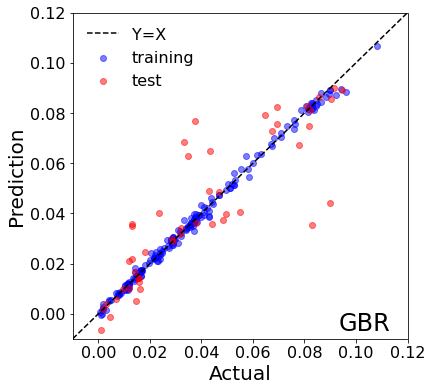

In [42]:
# 使用最优参数预测
best_gbr = grid_search.best_estimator_

# 使用最优模型进行预测

y_pred_train_gbr = best_gbr.predict(X_train)
y_pred_test_gbr = best_gbr.predict(X_test)

#作图
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_gbr, alpha = 0.5, color = 'b', label = 'training')  #alpha设置透明度
plt.scatter(y_test, y_pred_test_gbr, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线，您可以根据需要修改颜色和线型

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'GBR', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('O2_C_梯度提升回归不交叉验证.tiff', dpi = 720, bbox_inches='tight')

#算均方误差
from sklearn.metrics import mean_squared_error #引用均方差

print('training R2 = %.3f' %best_gbr.score(X_train, y_train))
print('test R2 = %.3f' %best_gbr.score(X_test, y_test))
rmse_tr_gbr = mean_squared_error(y_train, y_pred_train_gbr, squared = False) #squared = False 是表示对均方差求根，及得到均方根误差
rmse_te_gbr = mean_squared_error(y_test, y_pred_test_gbr, squared = False)
print('RMSE(training)%.3f'%rmse_tr_gbr)
print('RMSE(test)%.3f'%rmse_te_gbr)

In [55]:
from hyperopt import hp, tpe, fmin, Trials
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# 假设已经有训练集和测试集数据
# X_train, X_test, y_train, y_test = ...

# 定义目标函数
def objective(params):
    gbr = GradientBoostingRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        subsample=params['subsample'],
        max_features=params['max_features']
    )
    
    # 使用交叉验证评估模型性能
    score = cross_val_score(gbr, X_train, y_train, cv=10, scoring='r2').mean()
    
    # 目标是最大化 R² 分数，因此返回负值作为最小化目标
    return -score

# 定义超参数搜索空间
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None])
}

# 创建一个用于存储调参过程的 Trials 对象
trials = Trials()

# 使用贝叶斯优化算法（TPE）进行参数搜索
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,  # 指定最大评估次数
    trials=trials,
    rstate=np.random.default_rng(42)  # 设置随机种子
)

# 输出最佳参数
print("Best parameters found by Hyperopt:", best_params)


100%|█████████████████████████████████████████████| 100/100 [02:35<00:00,  1.55s/trial, best loss: -0.7112652460401333]
Best parameters found by Hyperopt: {'learning_rate': 0.1394144043057725, 'max_depth': 15.0, 'max_features': 2, 'min_samples_leaf': 2.0, 'min_samples_split': 20.0, 'n_estimators': 450.0, 'subsample': 0.9342661723722863}


In [59]:

# 使用最优参数重新训练GBR模型
best_gbr = GradientBoostingRegressor(
    n_estimators=int(best_params['n_estimators']),
    learning_rate=best_params['learning_rate'],
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    subsample=best_params['subsample'],
    max_features=['auto', 'sqrt', 'log2', None][best_params['max_features']]  # 使用找到的最优值
)

# 拟合训练数据
best_gbr.fit(X_train, y_train)

# 进行预测
y_pred_train_gbr = best_gbr.predict(X_train)
y_pred_test_gbr = best_gbr.predict(X_test)

# 输出模型性能
print('Training R2 = %.3f' % best_gbr.score(X_train, y_train))
print('Test R2 = %.3f' % best_gbr.score(X_test, y_test))

# 计算均方根误差（RMSE）
rmse_train_gbr = mean_squared_error(y_train, y_pred_train_gbr, squared=False)
rmse_test_gbr = mean_squared_error(y_test, y_pred_test_gbr, squared=False)
print('RMSE (training): %.3f' % rmse_train_gbr)
print('RMSE (test): %.3f' % rmse_test_gbr)


Training R2 = 0.999
Test R2 = 0.813
RMSE (training): 0.001
RMSE (test): 0.013


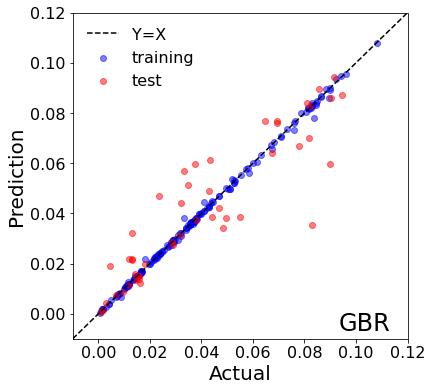

In [61]:

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_gbr, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_gbr, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'GBR', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('O2_C_梯度提升_贝叶斯优化_回归不交叉验证.tiff', dpi = 720, bbox_inches='tight')


Best R2 score (Linear Regression): -12.52180986105
training R2 = 0.355
test R2 = 0.392
RMSE(training) = 0.020
RMSE(test) = 0.023


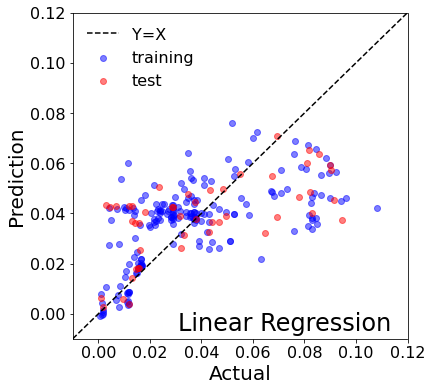

In [43]:
#2. 线性回归

# 导入必要库
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import matplotlib.pyplot as plt

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# 定义线性回归模型
lr = LinearRegression()

# 定义网格搜索的参数（线性回归没有超参数，所以我们可以直接使用默认参数）
# 这里使用 GridSearchCV 主要是为了保持与之前流程的一致性
param_grid = {}  # 线性回归没有超参数需要调节，网格为空

# 定义评分方法
scorer = make_scorer(r2_score)

# 创建 GridSearchCV 对象
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, scoring=scorer, cv=12)

# 拟合数据
grid_search_lr.fit(X, y)

# 输出最优参数和对应的分数（线性回归没有超参数，因此显示的只是 R2 得分）
print("Best R2 score (Linear Regression):", grid_search_lr.best_score_)

# 使用最优模型进行预测
best_lr = grid_search_lr.best_estimator_

y_pred_train_lr = best_lr.predict(X_train)
y_pred_test_lr = best_lr.predict(X_test)

# 绘图
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_train_lr, alpha=0.5, color='b', label='training')
plt.scatter(y_test, y_pred_test_lr, alpha=0.5, color='r', label='test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)], 
         [min(-0.01, 0.14), max(-0.01, 0.14)], 
         'k--', label='Y=X')

# 设置图例和标签
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])
plt.ylim([-0.01, 0.12])

# 添加文本
plt.text(0.95, 0.01, 'Linear Regression', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

# 保存图像
plt.savefig('O2_C_线性回归不交叉验证.tiff', dpi=720, bbox_inches='tight')

# 输出 R2 和均方根误差
print('training R2 = %.3f' % best_lr.score(X_train, y_train))
print('test R2 = %.3f' % best_lr.score(X_test, y_test))

rmse_tr_lr = mean_squared_error(y_train, y_pred_train_lr, squared=False)
rmse_te_lr = mean_squared_error(y_test, y_pred_test_lr, squared=False)

print('RMSE(training) = %.3f' % rmse_tr_lr)
print('RMSE(test) = %.3f' % rmse_te_lr)


In [44]:
#3. 随机森林回归

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 定义模型
rfr = RandomForestRegressor()

# 定义要搜索的参数网格
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # 树的数量
    'max_depth': [3, 4, 5],  # 树的最大深度
    'min_samples_split': [2, 5, 10]  # 节点分裂所需的最小样本数
}

# 定义评分方法
scorer_rf = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_rf = GridSearchCV(estimator=rfr, param_grid=param_grid_rf, scoring=scorer_rf, cv=10)

# 拟合数据
grid_search_rf.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_rf.best_params_)
print("Best R2 score:", grid_search_rf.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
Best R2 score: 0.5961312406034055


training R2 = 0.806
test R2 = 0.642
RMSE(training)0.011
RMSE(test)0.018


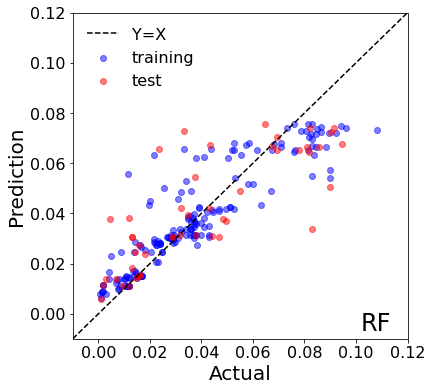

In [45]:

# 使用最优参数预测
best_rfr = grid_search_rf.best_estimator_

# 使用最优模型进行预测
y_pred_train_rf = best_rfr.predict(X_train)
y_pred_test_rf = best_rfr.predict(X_test)

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_rf, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_rf, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'RF', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('O2_C_随机森林回归_网格化搜索_不交叉验证.tiff', dpi = 720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' %best_rfr.score(X_train, y_train))
print('test R2 = %.3f' %best_rfr.score(X_test, y_test))
rmse_tr_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)  # 均方根误差
rmse_te_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)
print('RMSE(training)%.3f'%rmse_tr_rf)
print('RMSE(test)%.3f'%rmse_te_rf)

In [46]:
# 3.2 尝试使用贝叶斯优化搜索最优超参数，进行随机森林
from hyperopt import hp, tpe, fmin, Trials
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# 定义目标函数
def objective(params):
    gbr = GradientBoostingRegressor(
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        subsample=params['subsample']
    )
    
    # 使用交叉验证评估模型性能
    score = cross_val_score(gbr, X_train, y_train, cv=10, scoring='r2').mean()
    
    # 目标是最大化 R² 分数，因此返回负值作为最小化目标
    return -score

# 定义超参数搜索空间
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1),  # 叶节点最小样本数
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2'])  # 最大特征数
}

# 创建一个用于存储调参过程的 Trials 对象
trials = Trials()

# 使用贝叶斯优化算法（TPE）进行参数搜索
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,  # 指定最大评估次数
    trials=trials,
    rstate=np.random.default_rng(42)  # 设置随机种子
)

# 输出最佳参数
print("Best parameters found by Hyperopt:", best_params)


100%|█████████████████████████████████████████████| 100/100 [01:56<00:00,  1.16s/trial, best loss: -0.6794948143566242]
Best parameters found by Hyperopt: {'learning_rate': 0.05137116152035842, 'max_depth': 8.0, 'max_features': 2, 'min_samples_leaf': 3.0, 'min_samples_split': 4.0, 'n_estimators': 400.0, 'subsample': 0.6510865957388398}


In [47]:
# 使用最优参数重新训练随机森林模型
best_rfr = RandomForestRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=['auto', 'sqrt', 'log2'][best_params['max_features']]  # 使用找到的最优值
)

# 拟合训练数据
best_rfr.fit(X_train, y_train)

# 进行预测
y_pred_train_rf = best_rfr.predict(X_train)
y_pred_test_rf = best_rfr.predict(X_test)

# 输出模型性能
print('training R2 = %.3f' % best_rfr.score(X_train, y_train))
print('test R2 = %.3f' % best_rfr.score(X_test, y_test))

# 计算均方根误差（RMSE）
rmse_tr_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
rmse_te_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)
print('RMSE(training): %.3f' % rmse_tr_rf)
print('RMSE(test): %.3f' % rmse_te_rf)

training R2 = 0.765
test R2 = 0.626
RMSE(training): 0.012
RMSE(test): 0.018


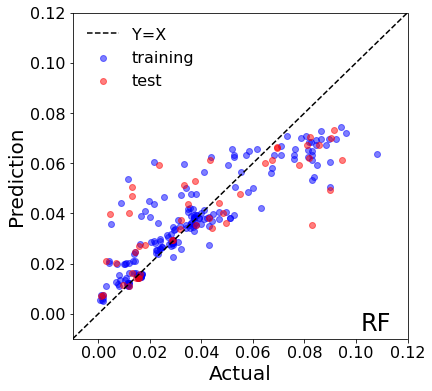

In [48]:

# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_rf, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_rf, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'RF', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('O2_C_随机森林_贝叶斯优化_回归不交叉验证.tiff', dpi = 720, bbox_inches='tight')


In [62]:
# 4. 基于贝叶斯优化的决策树回归

from hyperopt import hp, tpe, fmin, Trials
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# 定义目标函数
def objective(params):
    # 创建决策树回归器，并使用传入的超参数
    dtr = DecisionTreeRegressor(
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features']
    )
    
    # 使用交叉验证评估模型性能，这里使用 10 折交叉验证
    score = cross_val_score(dtr, X_train, y_train, cv=10, scoring='r2').mean()
    
    # 目标是最大化 R² 分数，因此返回负的 R² 作为最小化目标
    return -score

# 定义超参数搜索空间
space = {
    'max_depth': hp.quniform('max_depth', 3, 20, 1),  # 树的最大深度，离散均匀分布
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),  # 节点分裂所需的最小样本数
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),  # 叶节点最小样本数
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None])  # 最大特征数选择
}

# 创建一个用于存储调参过程的 Trials 对象
trials = Trials()

# 使用贝叶斯优化算法（TPE）进行参数搜索
best_params = fmin(
    fn=objective,  # 目标函数
    space=space,  # 超参数搜索空间
    algo=tpe.suggest,  # 贝叶斯优化算法
    max_evals=100,  # 最大评估次数
    trials=trials,  # 记录调参过程
    rstate=np.random.default_rng(42)  # 设置随机种子
)

# 输出最佳超参数
print("Best parameters found by Hyperopt:", best_params)

# 使用最优参数重新训练决策树模型
best_dtr = DecisionTreeRegressor(
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=['auto', 'sqrt', 'log2', None][best_params['max_features']]  # 使用找到的最优值
)

# 拟合训练数据
best_dtr.fit(X_train, y_train)

# 进行预测
y_pred_train_dt = best_dtr.predict(X_train)
y_pred_test_dt = best_dtr.predict(X_test)

# 输出模型性能
print('training R2 = %.3f' % best_dtr.score(X_train, y_train))
print('test R2 = %.3f' % best_dtr.score(X_test, y_test))

# 计算均方根误差（RMSE）
rmse_tr_dt = mean_squared_error(y_train, y_pred_train_dt, squared=False)
rmse_te_dt = mean_squared_error(y_test, y_pred_test_dt, squared=False)
print('RMSE(training): %.3f' % rmse_tr_dt)
print('RMSE(test): %.3f' % rmse_te_dt)


100%|█████████████████████████████████████████████| 100/100 [00:03<00:00, 27.55trial/s, best loss: -0.6065132621295856]
Best parameters found by Hyperopt: {'max_depth': 16.0, 'max_features': 0, 'min_samples_leaf': 1.0, 'min_samples_split': 10.0}
training R2 = 0.864
test R2 = 0.617
RMSE(training): 0.009
RMSE(test): 0.018


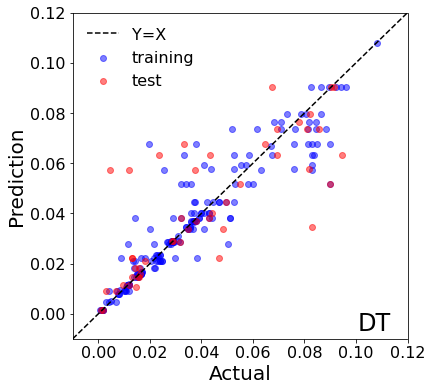

In [63]:
# 作图
plt.figure(figsize = (6, 6))
plt.scatter(y_train, y_pred_train_dt, alpha = 0.5, color = 'b', label = 'training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_dt, alpha = 0.5, color = 'r', label = 'test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'DT', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('O2_C_决策树回归_贝叶斯优化_回归不交叉验证.tiff', dpi = 720, bbox_inches='tight')

In [64]:
#3. 决策树回归_网格化搜索_不交叉验证

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 定义模型
dtr = DecisionTreeRegressor()

# 定义要搜索的参数网格
param_grid_dt = {
    'max_depth': [3, 4, 5, 10, 15],  # 树的最大深度
    'min_samples_split': [2, 5, 10],  # 节点分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 5]  # 叶节点的最小样本数
}

# 定义评分方法
scorer_dt = make_scorer(r2_score)  # 使用R2分数

# 创建GridSearchCV对象
grid_search_dt = GridSearchCV(estimator=dtr, param_grid=param_grid_dt, scoring=scorer_dt, cv=10)

# 拟合数据
grid_search_dt.fit(X_train, y_train)

# 输出最优参数和对应的分数
print("Best parameters:", grid_search_dt.best_params_)
print("Best R2 score:", grid_search_dt.best_score_)


Best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best R2 score: 0.5951203658319396


training R2 = 0.825
test R2 = 0.618
RMSE(training): 0.011
RMSE(test): 0.018


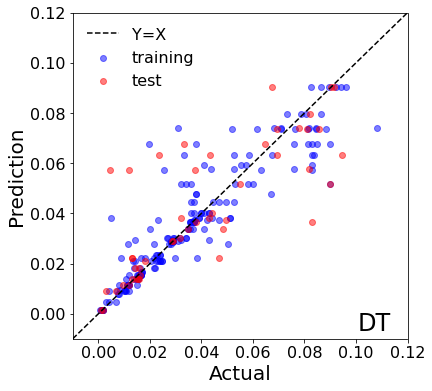

In [65]:
# 使用最优参数预测
best_dtr = grid_search_dt.best_estimator_

# 使用最优模型进行预测
y_pred_train_dt = best_dtr.predict(X_train)
y_pred_test_dt = best_dtr.predict(X_test)

# 作图
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_train_dt, alpha=0.5, color='b', label='training')  # alpha设置透明度
plt.scatter(y_test, y_pred_test_dt, alpha=0.5, color='r', label='test')

# 添加 y=x 线
plt.plot([min(-0.01, 0.14), max(-0.01, 0.14)],  # X 轴范围
         [min(-0.01, 0.14), max(-0.01, 0.14)],  # Y 轴范围
         'k--', label='Y=X')  # 'k--' 是黑色虚线

# 设置图例字体大小
plt.legend(fontsize=16, frameon=False)
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Prediction', fontsize=20)

# 设置轴刻度的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# 设置X轴和Y轴的范围
plt.xlim([-0.01, 0.12])  # 替换min_value_x和max_value_x为您希望的范围的最小值和最大值
plt.ylim([-0.01, 0.12])  # 替换min_value_y和max_value_y为您希望的范围的最小值和最大值

# 在图的右上角添加文本
plt.text(0.95, 0.01, 'DT', fontsize=24, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.savefig('O2_C_决策树回归_网格化搜索_不交叉验证.tiff', dpi=720, bbox_inches='tight')

# 计算R2和均方误差
print('training R2 = %.3f' % best_dtr.score(X_train, y_train))
print('test R2 = %.3f' % best_dtr.score(X_test, y_test))
rmse_tr_dt = mean_squared_error(y_train, y_pred_train_dt, squared=False)  # 均方根误差
rmse_te_dt = mean_squared_error(y_test, y_pred_test_dt, squared=False)
print('RMSE(training): %.3f' % rmse_tr_dt)
print('RMSE(test): %.3f' % rmse_te_dt)
